In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [2]:
bike=pd.read_csv('bike.csv')

In [3]:
bike.head()

,Name,year,kms,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,115000
2,Hyosung GT250R 2012,2012,14795 Km,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,197500


In [4]:
bike.shape

(7857, 4)

In [5]:
bike.shape

(7857, 4)

In [6]:

# Convert 'kms' column to 64-bit integer
bike['kms'] = pd.to_numeric(bike['kms'].astype(str).str.split().str.get(0).str.replace(',', ''), errors='coerce', downcast='integer')

# Drop rows where 'kms' column couldn't be converted to integer
bike = bike.dropna(subset=['kms'])

# Convert 'kms' column to 64-bit integer
bike['kms'] = bike['kms'].astype('int64')


In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5869 entries, 0 to 7856
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5869 non-null   object
 1   year    5869 non-null   int64 
 2   kms     5869 non-null   int64 
 3   price   5869 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 229.3+ KB


In [8]:
bike.describe(include='all')

,Name,year,kms,price
count,5869,5869.000000,5869.000000,5.869000e+03
unique,1287,NaN,NaN,NaN
top,Royal Enfield Classic 350cc 2017,NaN,NaN,NaN
freq,78,NaN,NaN,NaN
mean,NaN,2015.525302,23090.124723,1.191618e+05
std,NaN,3.958017,28710.628053,1.488788e+05
min,NaN,1970.000000,0.000000,0.000000e+00
25%,NaN,2014.000000,8903.000000,4.700000e+04
50%,NaN,2016.000000,17000.000000,8.500000e+04
75%,NaN,2018.000000,30000.000000,1.375000e+05


In [9]:
bike=bike[bike['price']<5000000]

In [10]:
import seaborn as sns

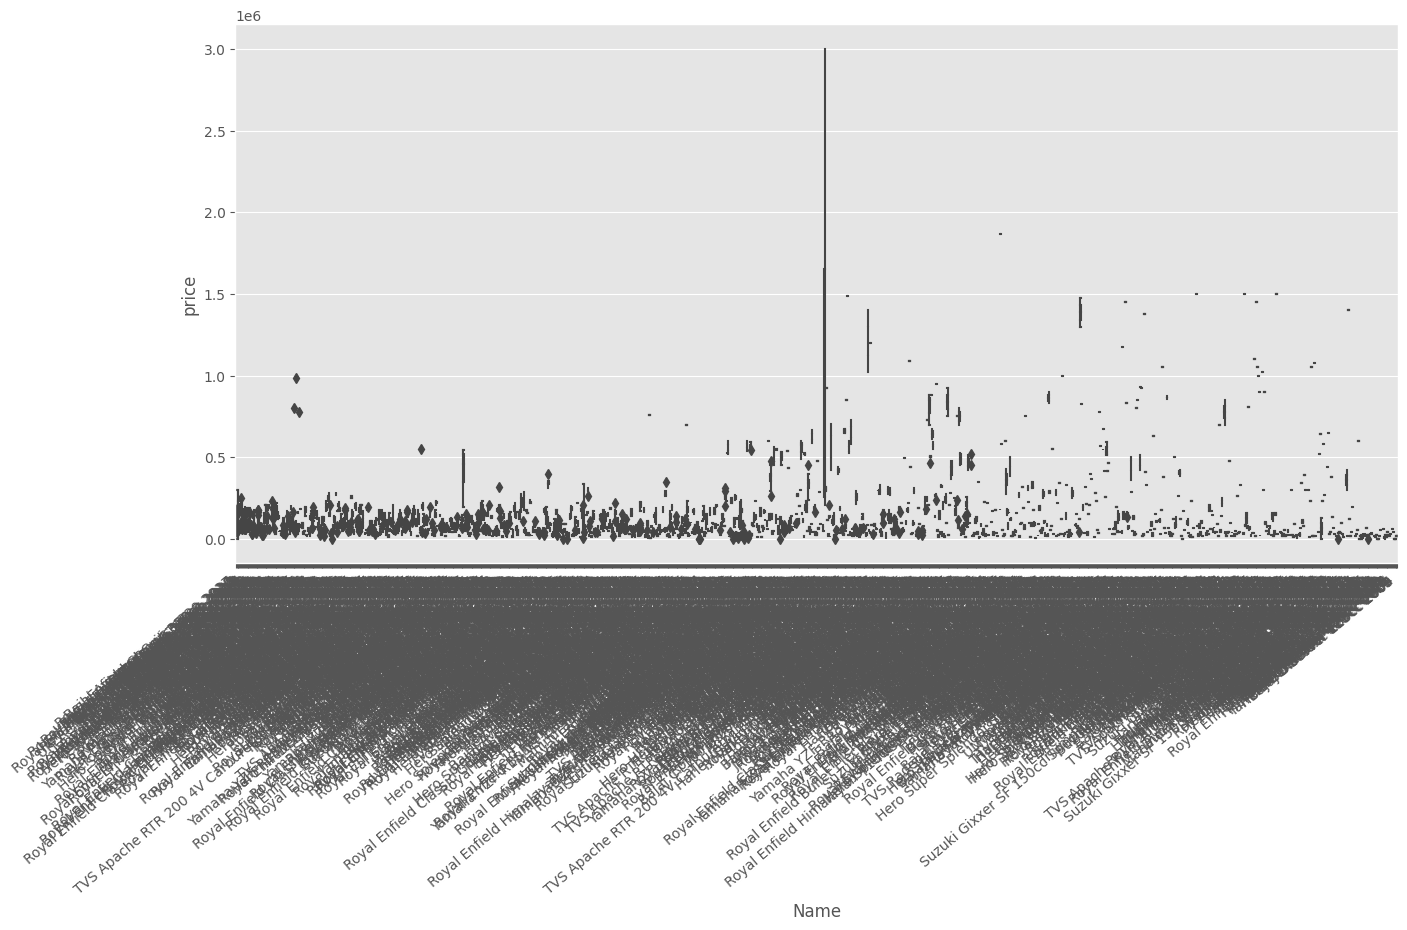

In [11]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Name',y='price',data=bike)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

C:\Users\AM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\AM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\AM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\AM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarnin

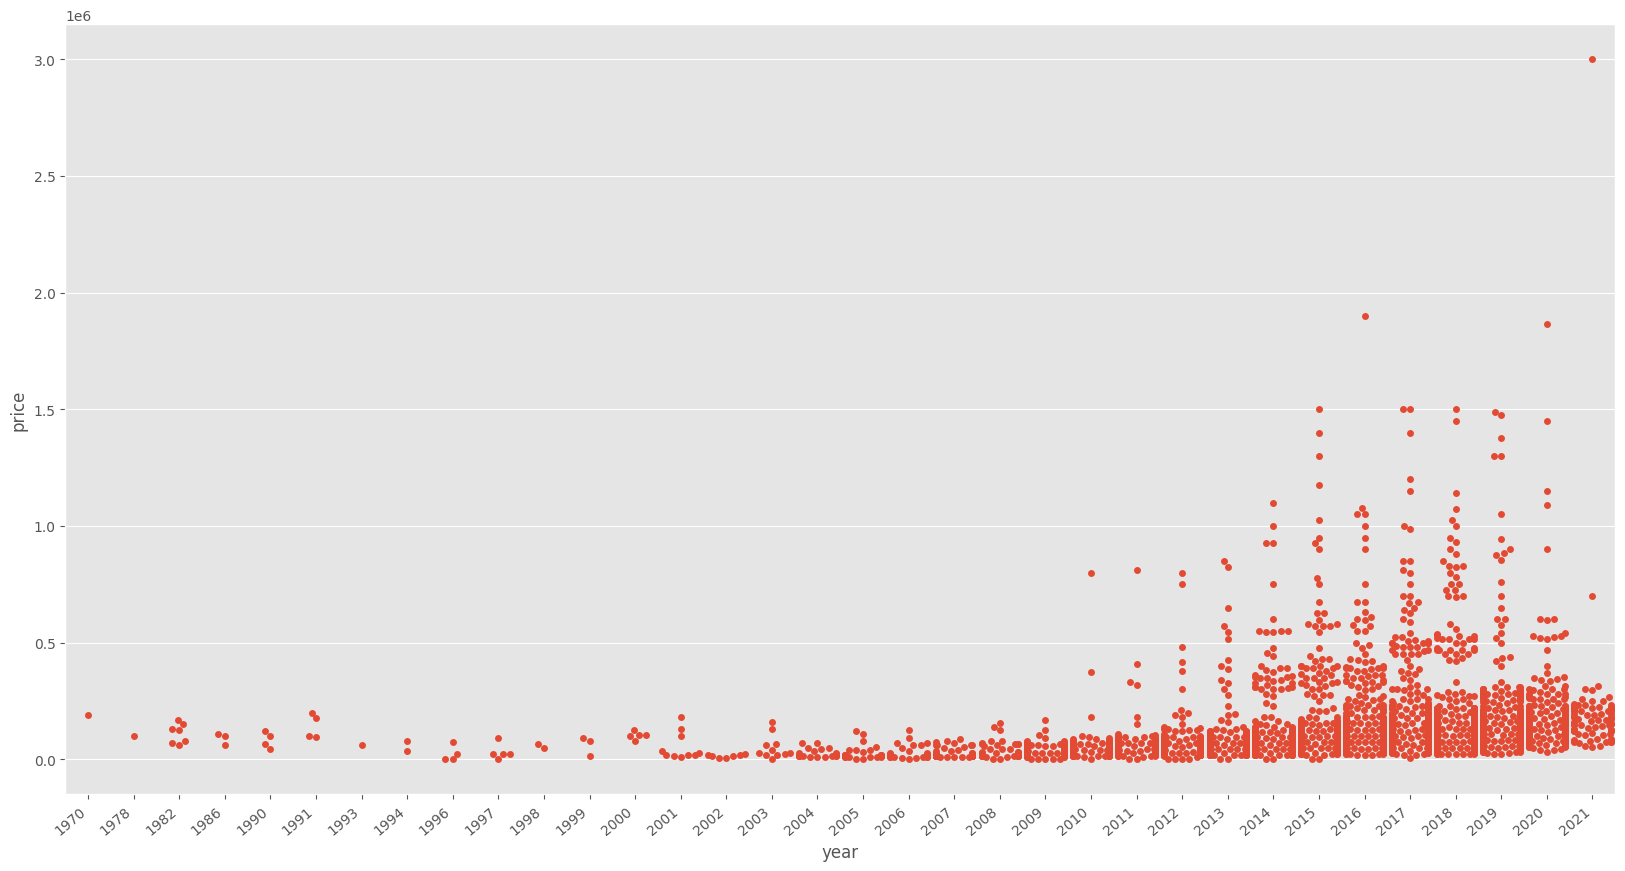

In [12]:
plt.figure(figsize=(20, 10)) 
ax = sns.swarmplot(x='year', y='price', data=bike)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

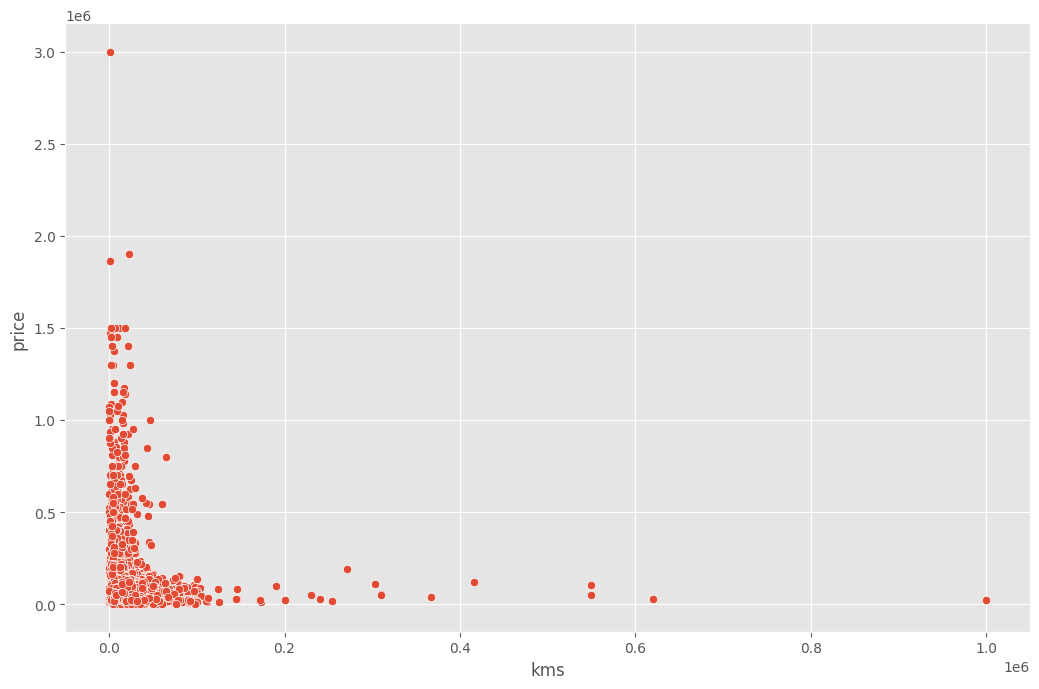

In [13]:
sns.relplot(x='kms',y='price',data=bike,height=7,aspect=1.5)

In [14]:
X=bike[['Name','year','kms']]
y=bike['price']

In [15]:
X

,Name,year,kms
0,Bajaj Avenger Cruise 220 2017,2017,17000
1,Royal Enfield Classic 350cc 2016,2016,50000
2,Hyosung GT250R 2012,2012,14795
4,Jawa Perak 330cc 2020,2020,2000
5,KTM Duke 200cc 2012,2012,24561
...,...,...,...
7850,TVS Apache RTR 160 4V Carburetor With Rear Dis...,2018,16510
7852,Yamaha YZF-R15 150cc 2011,2011,7000
7854,Bajaj Pulsar 180cc 2016,2016,6407
7855,Bajaj V15 150cc 2016,2016,7524


In [16]:
y.shape

(5869,)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [18]:
from sklearn.linear_model import LinearRegression


In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [22]:
oh=OneHotEncoder()
oh.fit(X[['Name']])

OneHotEncoder()

In [28]:
column_trans=make_column_transformer((OneHotEncoder(categories=oh.categories_),['Name']),
                                    remainder='passthrough')

In [29]:
lr=LinearRegression()

In [30]:
pipe=make_pipeline(column_trans,lr)

In [31]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array([' Bajaj CT100 B 2016                                                ',
       'Aprilia RSV4 R APRC 1000cc 2014', 'Aprilia RSV4 RR 2020', ...,
       'Yamaha YZFR15 2.0 150 2016', 'Yazdi Road King 250cc 1986',
       'yamaha Libero 110cc 2006'], dtype=object)]),
                                                  ['Name'])])),
                ('linearregression', LinearRegression())])

In [32]:
y_pred=pipe.predict(X_test)

In [33]:
r2_score(y_test,y_pred)

0.07216461475970792

In [34]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [35]:
np.argmax(scores)

356

In [36]:
scores[np.argmax(scores)]

0.13912417544373024

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.13912417544373024

In [44]:
import pickle

In [45]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [48]:
pipe.steps[0][1].transformers[0][1].categories[0]

array([' Bajaj CT100 B 2016                                                ',
       'Aprilia RSV4 R APRC 1000cc 2014', 'Aprilia RSV4 RR 2020', ...,
       'Yamaha YZFR15 2.0 150 2016', 'Yazdi Road King 250cc 1986',
       'yamaha Libero 110cc 2006'], dtype=object)